# Query for existing calib collections

 work with Weakly_2022_39
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/11/09
- update : 2022/11/09


In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_39/atmospec 	setup
drp_pipe              LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_39/drp_pipe 	setup
eups                  LOCAL:/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2022_39/conda/envs/lsst-scipipe-4.1.0/eups 	setup
rapid_analysis        LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_39/rapid_analysis 	setup


In [2]:
! eups list -s lsst_distrib

   g0b29ad24fb+a10408d0bf 	w_latest current w_2022_39 setup


In [3]:
import lsst.daf.butler as dafButler

In [4]:
# Load libraries:
import numpy as np
import matplotlib.pyplot as plt

import lsst.daf.butler as dafButler
import lsst.afw.display 

In [5]:
repo = '/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/butler.yaml'
butler = dafButler.Butler(repo)
registry = butler.registry

In [6]:
for c in sorted(registry.queryCollections()):
    if 'u/dagoret/first_test' in c:
        pass
    else:
        print(c)

LATISS/calib
LATISS/calib/DM-28636
LATISS/calib/DM-28636/curated/19700101T000000Z
LATISS/calib/DM-28636/curated/20180101T000000Z
LATISS/calib/DM-28636/unbounded
LATISS/calib/DM-33875
LATISS/raw/all
refcats
u/calib/DM-32209-20211013a-felh
u/calib/DM-32209-20211013a-g
u/czw/DM-28920/biasGen.20210702a/20210702T215049Z
u/czw/DM-28920/calib/bias.20210720
u/czw/DM-28920/calib/dark.20210720a
u/czw/DM-28920/calib/defect.20210720a
u/czw/DM-28920/calib/flat.20210720
u/czw/DM-28920/darkGen.20210707d/20210707T215331Z
u/czw/DM-28920/defectGen.20210720a/20210720T230634Z
u/czw/DM-28920/flatGen.20210720Xa/20210720T223935Z
u/czw/DM-28920/flatGen.20210720Xb/20210720T225330Z
u/czw/DM-32209/flatGen.20211013a-felh/20211013T214128Z
u/czw/DM-32209/flatGen.20211013a-g/20211013T185808Z
u/czw/calibX
u/czw/calibX.20220608
u/czw/defects.20220608
u/dagoret/bootcamp.20220818/biasGen.20220818a
u/dagoret/bootcamp.20220818/biasGen.20220818a/20220818T154547Z
u/dagoret/bootcamp.20220818/biasGen.20220818a/20220818T154814

## In my flat


In [7]:
# Which calibration type to analyse.
calibType = 'flat'
physical_filter = 'empty~empty'
detectorId = 0
# Camera
cameraName = 'LATISS'

# Collection name containing the verification outputs.
verifyCollection = 'u/dagoret/myflats.20221109/verifyFlat.20220317c'
# Collection that the calibration was constructed in.
genCollection = 'u/dagoret/myflats.20221109/flatGen.20220317c'

In [8]:
# Get butler and camera
butler = dafButler.Butler('/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/butler.yaml', collections=[verifyCollection, genCollection])
camera = butler.get('camera', instrument=cameraName)

In [9]:
calib = butler.get(calibType, instrument=cameraName, physical_filter=physical_filter, detector=detectorId)
calibArray = calib.getImage().getArray()

vmin=-1.290,vmax=9.528,vmean=0.999,vmed=0.998,vstd=0.026


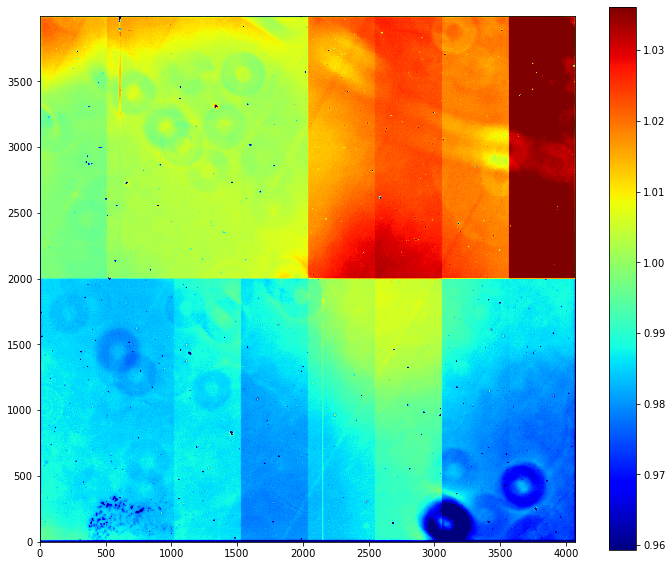

In [10]:
vmin=calib.image.array.min()
vmax=calib.image.array.max()
vmean=calib.image.array.mean()
vmed=np.median(calib.image.array)
vstd=np.std(calib.image.array)
print(f"vmin={vmin:.3f},vmax={vmax:.3f},vmean={vmean:.3f},vmed={vmed:.3f},vstd={vstd:.3f}")
nsig=1.5
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,10))
im=ax.imshow(calib.image.array,origin="lower",vmin=vmed-nsig*vstd,vmax=vmed+nsig*vstd,cmap="jet")
fig.colorbar(im)

In [11]:
dict(calib.getMetadata())

{'CALIB_CREATE_DATE': '2022-11-09',
 'CALIB_CREATE_TIME': '22:30:45 CET',
 'COMMENT': '---- Geometry from Camera ----',
 'ORIGIN': 'LSST DM Header Service',
 'IMGTYPE': 'FLAT',
 'BUNIT': 'adu',
 'FACILITY': 'Vera C. Rubin Observatory',
 'TELESCOP': 'LSST AuxTelescope',
 'INSTRUME': 'LATISS',
 'OBSERVER': 'LSST',
 'OBSGEO-X': 1818938.94,
 'OBSGEO-Y': -5208470.95,
 'OBSGEO-Z': -3195172.08,
 'RA': 0.0,
 'DEC': 0.0,
 'ROTCOORD': 'sky',
 'HASTART': 0.0,
 'AMSTART': 0.0,
 'HAEND': 0.0,
 'AMEND': 0.0,
 'INSTPORT': 2,
 'ATM3PORT': None,
 'TRACKSYS': 'LOCAL',
 'RADESYS': 'ICRS',
 'DOMEAZ': 273.02,
 'SHUTLOWR': 0.0,
 'SHUTUPPR': 100.0,
 'WCSAXES': 2,
 'CTYPE1': 'RA---TAN',
 'CTYPE2': 'DEC--TAN',
 'CUNIT1': 'deg',
 'CUNIT2': 'deg',
 'CRVAL1': 0.0,
 'CRVAL2': 0.0,
 'CRPIX1': 2000.0,
 'CRPIX2': 2036.0,
 'EQUINOX': 2000.0,
 'CAMCODE': 'AT',
 'CONTRLLR': 'O',
 'DAYOBS': '20220317',
 'TESTTYPE': 'FLAT',
 'EMUIMAGE': '',
 'CURINDEX': 0,
 'MAXINDEX': 1,
 'TSTAND': None,
 'OBSANNOT': '',
 'TEMP_SET': -94

# in collection LATISS/calib

In [12]:
collection = "LATISS/calib"
datasetRefs = registry.queryDatasets(datasetType='*', collections=collection, where= "instrument='LATISS'")

In [13]:

for i, ref in enumerate(datasetRefs):
   
    print(f"========({i})================datasetType = {ref.datasetType}  ============================================")
    print("fullId....................:",ref.dataId.full)
    print("dataId....................:",ref.dataId)
    print("datasetType...............:",ref.datasetType)
    #print("band....................:",ref.dataId["band"])
    #print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.......................:",ref.run)
    
    if ref.datasetType.isCalibration():
        print("calibration: .............:",ref.datasetType.isCalibration())
        print("name       : .............:",ref.datasetType.name)
        #if ref.datasetType.name == "bias":
        #    bias =  butler.get('bias',collection)
        #elif ref.datasetType.name == "camera":
        #    camera =  butler.get('camera',collection)
            
        
    #the_exposure = ref.dataId["exposure"]
    #the_day_obs = ref.dataId["exposure"]//100_000
    #the_seq_num = ref.dataId["exposure"]- the_day_obs*100_000    
    #the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    #print(the_dataId)
    #flat = butler.get('flat',collection)
    #postisrccd = butler.get('postISRCCD', exposure=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    #all_dataId.append(the_dataId) 
    #all_exposures.append(the_exposure)
    #all_postisrccd.append(postisrccd)
    #if i >= 0:
    #    break

========(0)================datasetType = DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)  ============================================
fullId....................: {instrument: 'LATISS', detector: 0}
dataId....................: {instrument: 'LATISS', detector: 0}
datasetType...............: DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
run.......................: u/czw/DM-28920/biasGen.20210702a/20210702T215049Z
calibration: .............: True
name       : .............: bias
========(1)================datasetType = DatasetType('camera', {instrument}, Camera, isCalibration=True)  ============================================
fullId....................: {instrument: 'LATISS'}
dataId....................: {instrument: 'LATISS'}
datasetType...............: DatasetType('camera', {instrument}, Camera, isCalibration=True)
run.......................: LATISS/calib/DM-28636/unbounded
calibration: .............: True
name       : ............

# In collections



      u/dagoret/myflats.20221108/flatGen.20220317a
      u/dagoret/myflats.20221108/flatGen.20220317a/20221108T165712Z
      u/dagoret/myflats.20221108/flatGen.20220317a/20221108T165819Z
      u/dagoret/myflats.20221108/flatGen.20220317b
      u/dagoret/myflats.20221108/flatGen.20220317b/20221108T170723Z

In [14]:
my_collection = ["u/dagoret/myflats.20221109/flatGen.20220317c"]
datasetRefs2 = registry.queryDatasets(datasetType='*', collections=my_collection, where= "instrument='LATISS'")

In [15]:
for i, ref in enumerate(datasetRefs2):
   
    print(f"========({i})================datasetType = {ref.datasetType}  ============================================")
    print("fullId....................:",ref.dataId.full)
    print("dataId....................:",ref.dataId)
    print("datasetType...............:",ref.datasetType)
    #print("band....................:",ref.dataId["band"])
    #print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.......................:",ref.run)
    
    if ref.datasetType.isCalibration():
        print("calibration: .............:",ref.datasetType.isCalibration())
        print("name       : .............:",ref.datasetType.name)

========(0)================datasetType = DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)  ============================================
fullId....................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~empty', exposure: 2021021600208}
dataId....................: {instrument: 'LATISS', detector: 0, exposure: 2021021600208, ...}
datasetType...............: DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)
run.......................: LATISS/raw/all
========(1)================datasetType = DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)  ============================================
fullId....................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'RG610~empty', exposure: 2021021600163}
dataId....................: {instrument: 'LATISS', detector: 0, exposure: 2021021600163, ...}
datasetType...............: DatasetType('

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

